In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
import numpy as np
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
df = pd.read_csv(r'..\stocks\AMZN.csv', index_col=['Date'], parse_dates=['Date'])
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988


### Data Frame ‘Company_name’, ‘Date’, ‘High’, ‘Low’, ‘Open’ ,‘Close’, ‘Volume’, ‘Adj. Close’. 
* Volume is the number of shares that changed hands (Traded) during a given day. 
* Adj closing price (used to examine historical returns) factors in anything that might affect the stock price after the market is closed.

In [3]:
df.shape

(1287, 6)

In [4]:
# Described Amazon's stock data
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000
mean,1610.964342,1575.321966,1594.400715,1593.777132,4.405407e+06,1593.777132
std,788.947435,766.400268,778.682852,777.443648,2.139694e+06,777.443648
min,493.500000,474.000000,478.010010,482.070007,8.813000e+05,482.070007
25%,908.524994,896.529999,901.829987,902.024994,2.932750e+06,902.024994
50%,1639.989990,1601.219971,1623.530029,1626.229980,3.801900e+06,1626.229980
75%,1916.625000,1883.049988,1902.000000,1899.984985,5.253450e+06,1899.984985
max,3552.250000,3486.689941,3547.000000,3531.449951,1.656500e+07,3531.449951


In [5]:
df.nunique()

High         1267
Low          1270
Open         1250
Close        1275
Volume       1272
Adj Close    1275
dtype: int64

In [6]:
#cleaning the data
#check the missing data
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

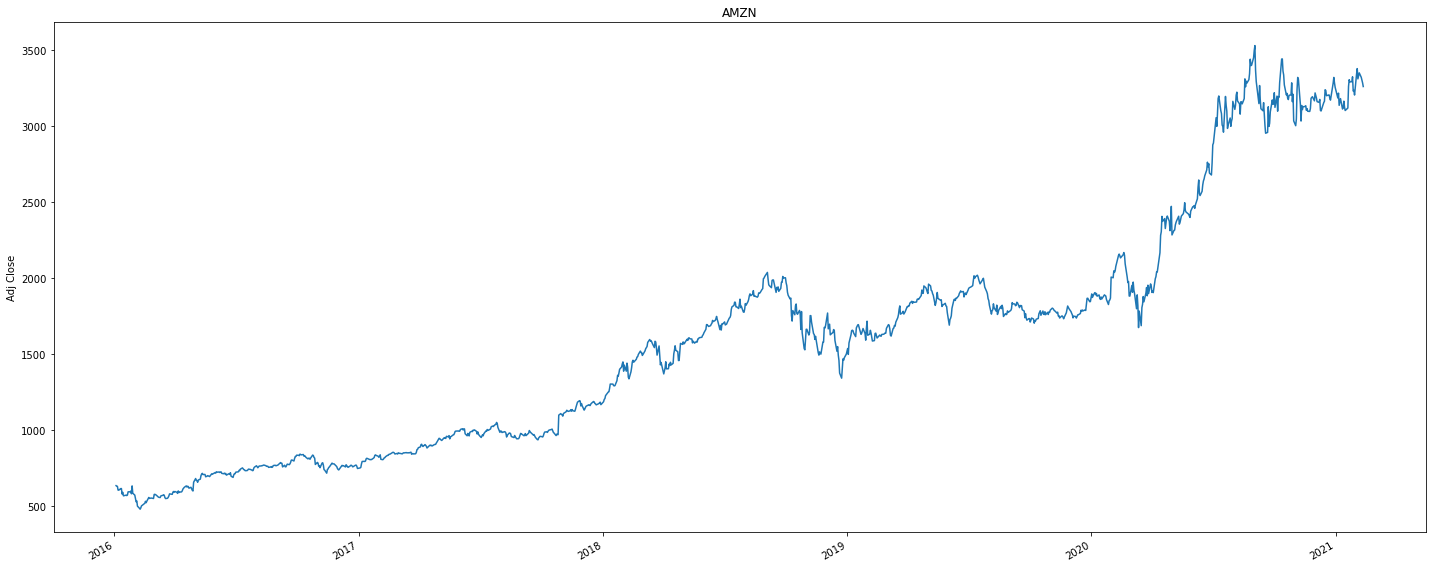

In [7]:
# To see a historical view of the closing price. For historical view I’ll be using Adj. Closing price
plt.figure(figsize=(20, 8))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('AMZN')
plt.tight_layout()

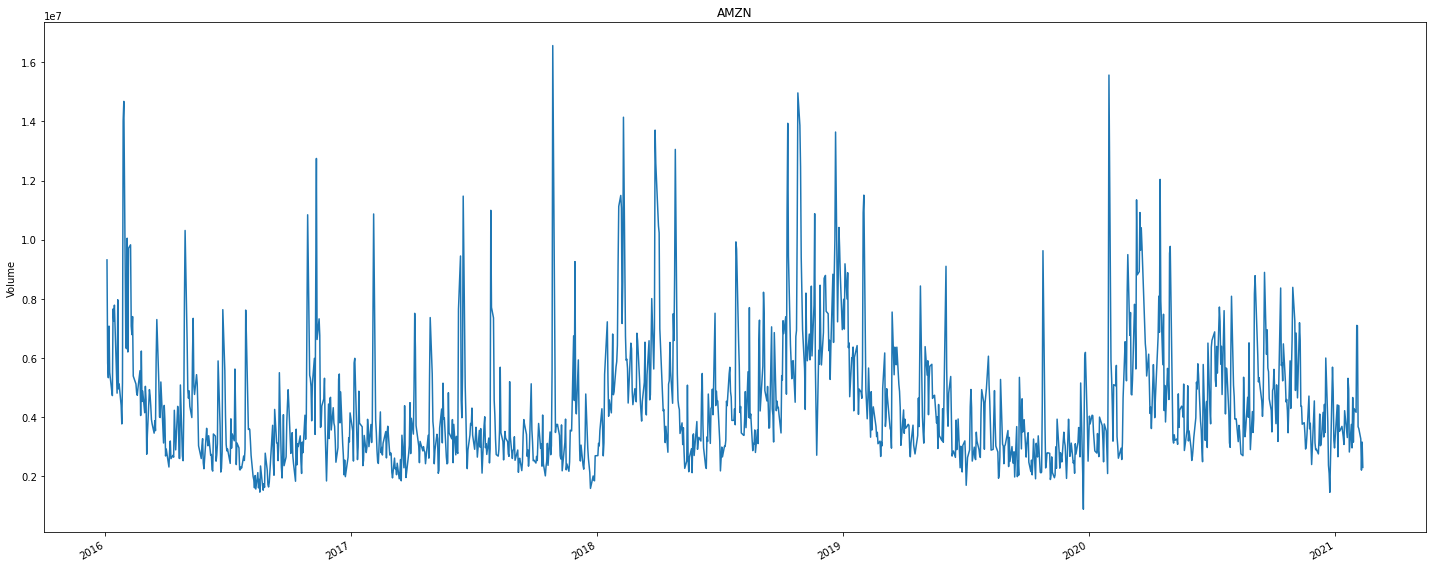

In [8]:
# For plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title('AMZN')
plt.tight_layout()

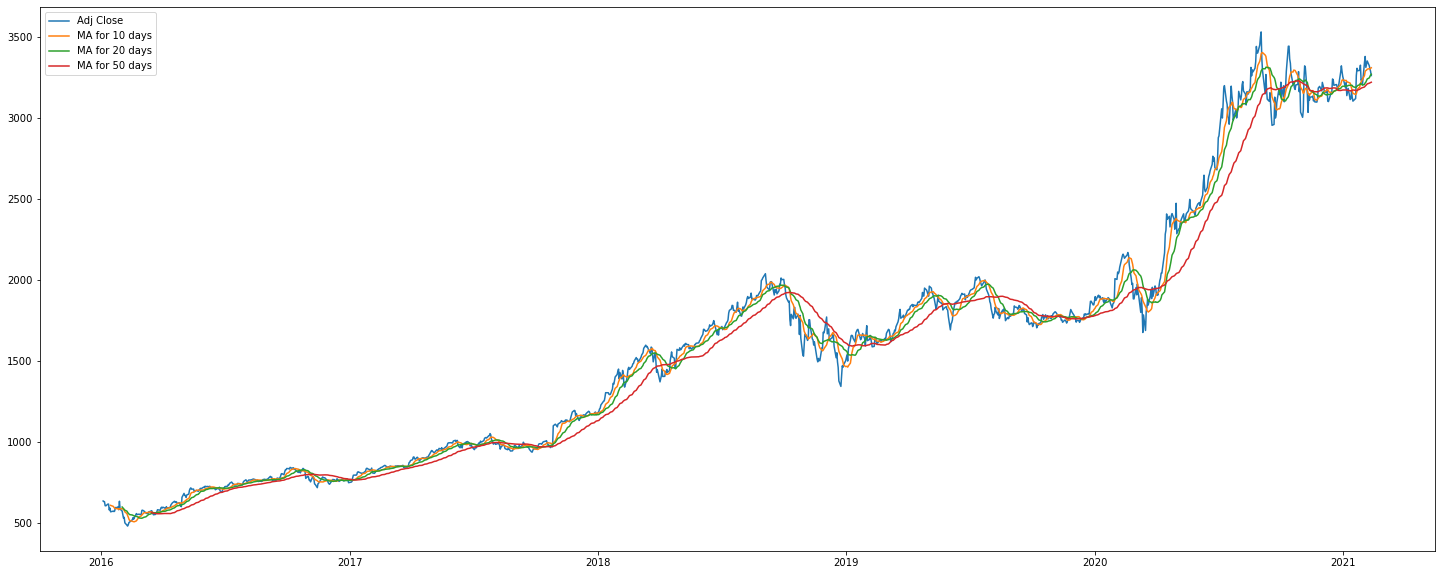

In [9]:
# Calculating Moving Average with lag of 10, 20, 50 days.
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f'MA for {ma} days'
    df[column_name] = df['Adj Close'].rolling(ma).mean()

fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(df['Adj Close'], label= 'Adj Close')
ax.plot(df['MA for 10 days'], label='MA for 10 days')
ax.plot(df['MA for 20 days'], label='MA for 20 days')
ax.plot(df['MA for 50 days'], label='MA for 50 days')
ax.legend()
plt.show()

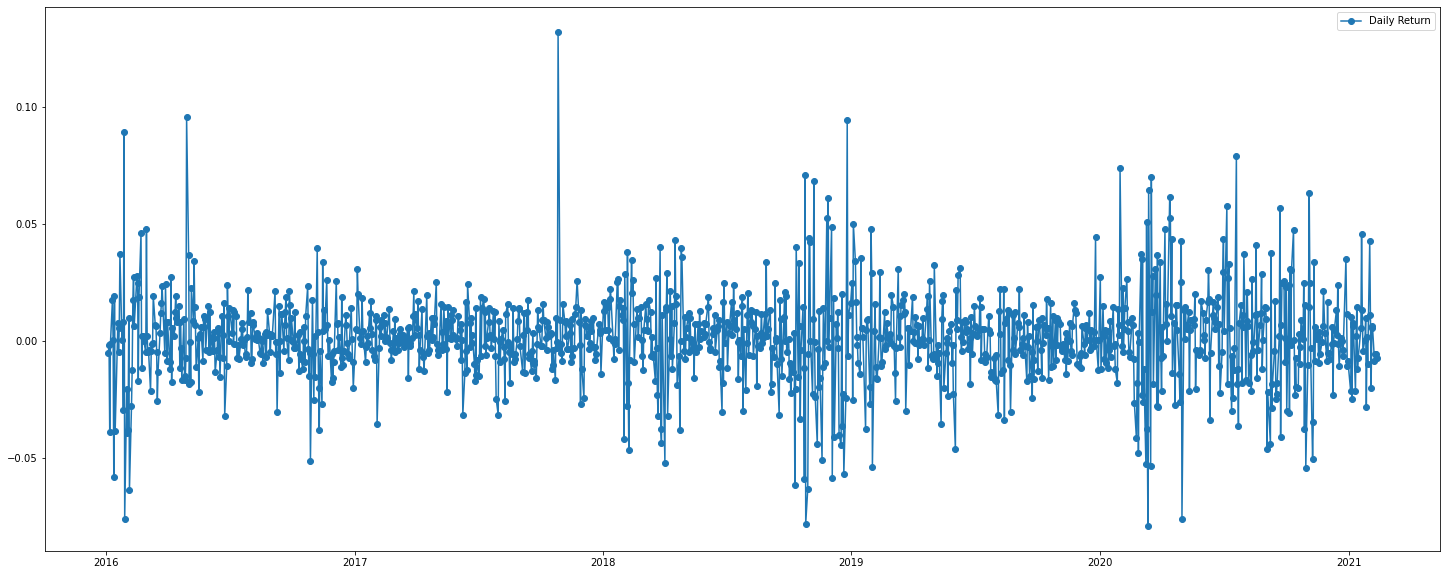

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()
    
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(df['Daily Return'], label= 'Daily Return', linestyle='-', marker='o')
ax.legend()
plt.show()

### Test for stationary series

In [11]:
df = pd.read_csv(r'..\stocks\AMZN.csv', index_col=['Date'], parse_dates=['Date'])
# Drop NaNs
df = df.dropna()
# Select the proper time period for daily aggreagation
df = df['2019-01-02':'2020-12-05'].resample('D').sum()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-05,0.000000,0.000000,0.000000,0.000000,0,0.000000
2019-01-06,0.000000,0.000000,0.000000,0.000000,0,0.000000


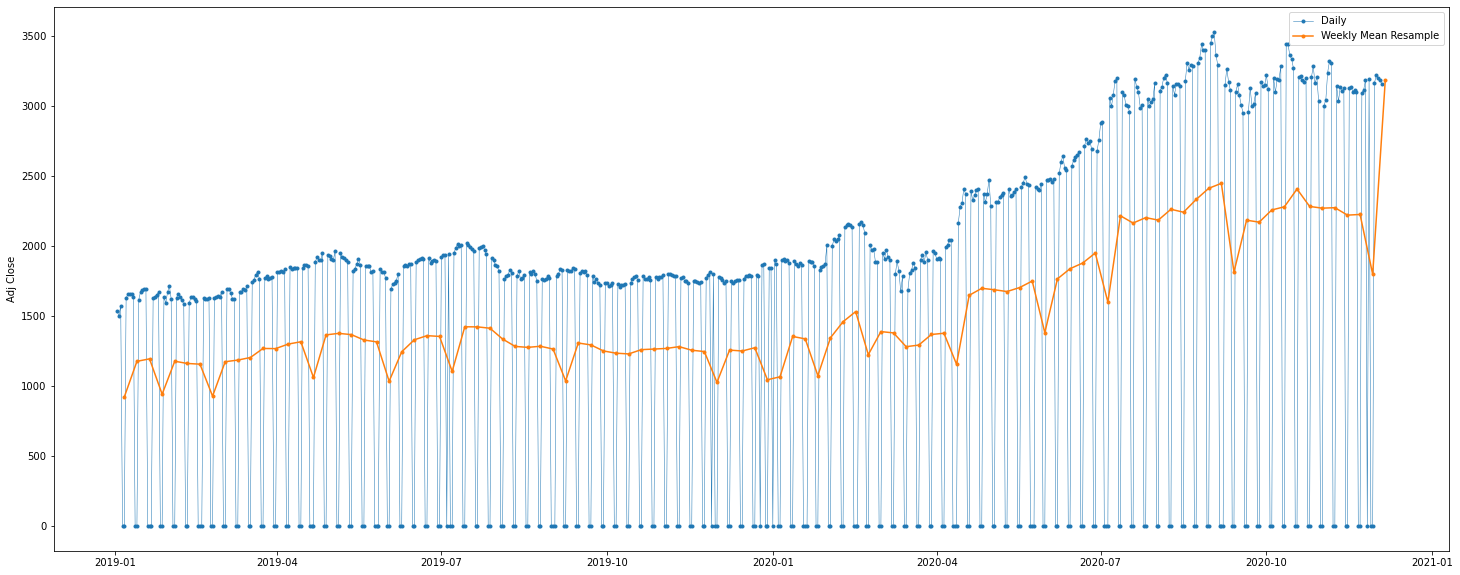

In [12]:
adj_close = df['Adj Close']
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(adj_close,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(adj_close.resample('W').mean(),marker='o', markersize=3, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Adj Close')
ax.legend();

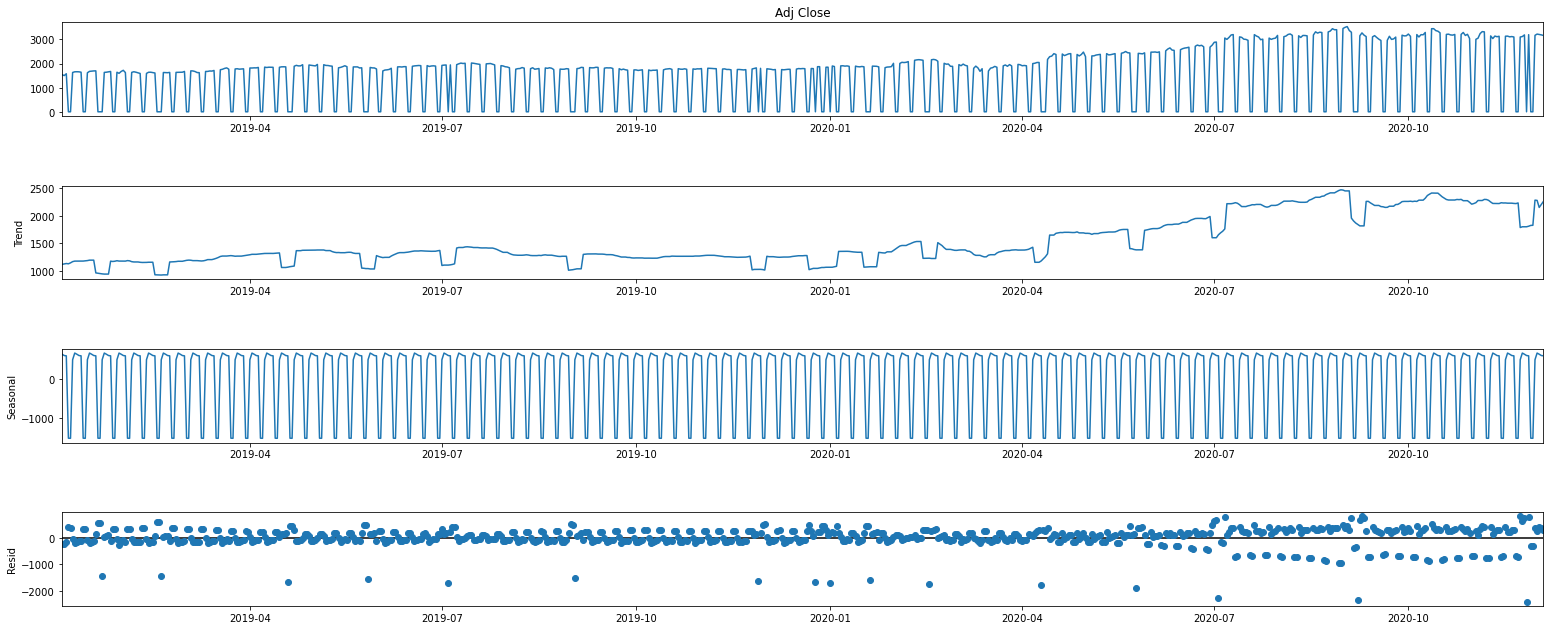

In [13]:
# graphs to show seasonal_decompose
def seasonal_decompose (adj_close):
    decomposition = sm.tsa.seasonal_decompose(adj_close, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(25, 10)
    plt.show()
    
seasonal_decompose(adj_close)

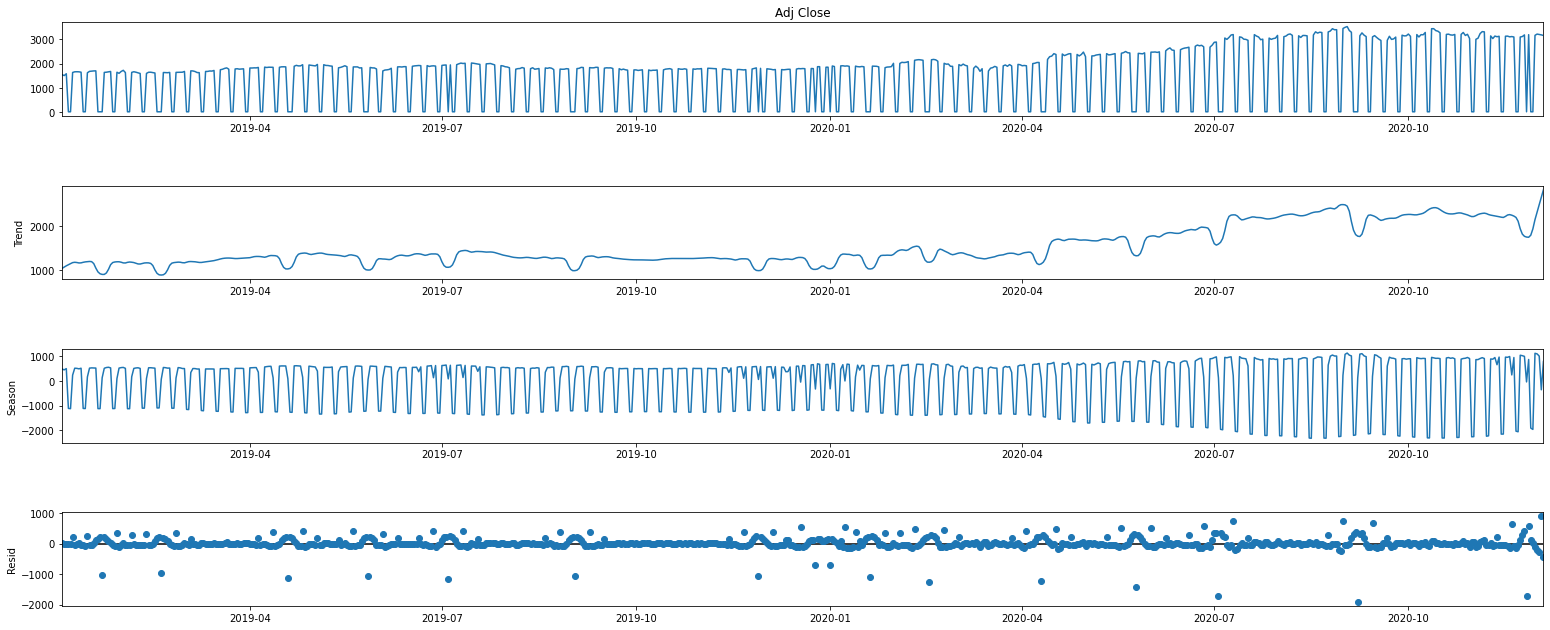

In [14]:
# graphs to show stl_decompose
def stl_decompose (adj_close):
    decomposition = STL(adj_close).fit()
    fig = decomposition.plot()
    fig.set_size_inches(25, 10)
    plt.show()

stl_decompose(adj_close)

### Check for Stationarity:

In [15]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

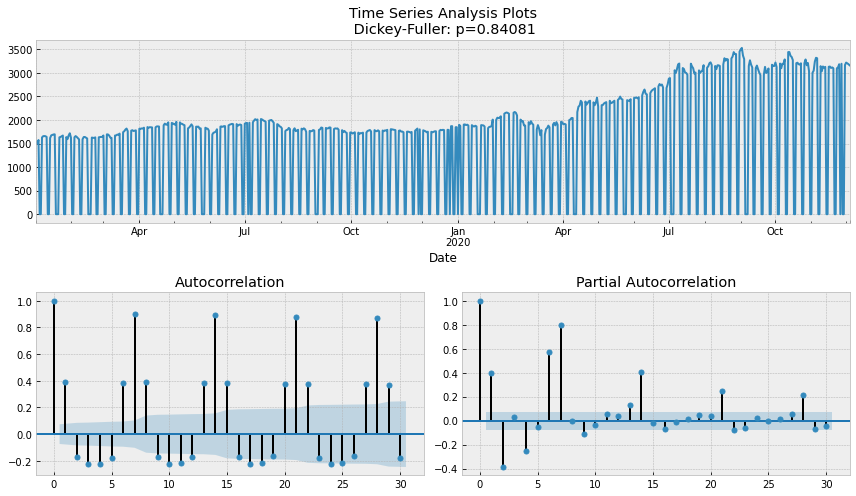

In [16]:
tsplot(df['Adj Close'], lags=30)

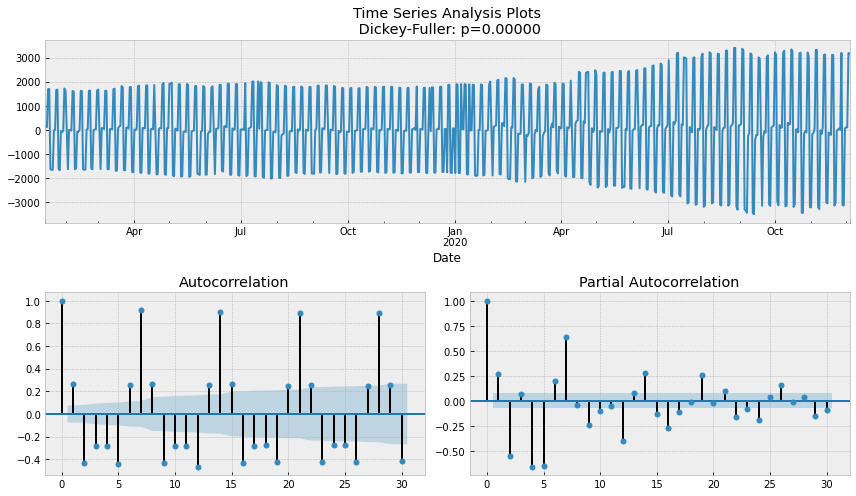

In [17]:
ads_diff = df['Adj Close'] - df['Adj Close'].shift(12)
tsplot(ads_diff[12:], lags=30)